In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import pydot
import pydotplus
import graphviz

In [2]:
#Loading the Data-set
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.shape

(252, 15)

In [5]:
x = df.drop("BodyFat",axis=1)
y = df["BodyFat"]

In [6]:
# Normalizing the data using MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
# y = np.array(y)
# y = scale.fit_transform(y.reshape(252,1))

In [7]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

In [8]:
x_train.shape

(214, 14)

1. a)
Model with 1 Hidden Layer

In [65]:
model1 = tf.keras.Sequential()

model1.add(layers.InputLayer(14,name="InputLayer"))
#model1.add(layers.Dense(14,input_dim=x_train.shape[1],activation="relu",name="InputLayer"))
model1.add(layers.Dense(128,activation="relu",name="HiddenLayer1"))
model1.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model1.compile(loss="MeanAbsoluteError",optimizer=opt,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 OutputLayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


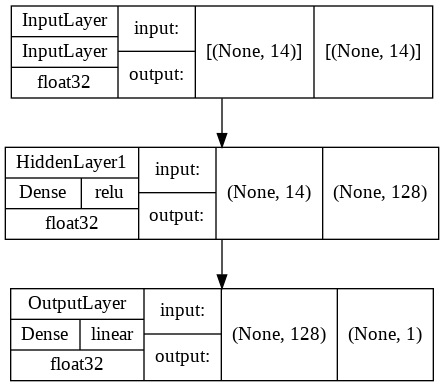

In [66]:
model1_img_file = 'model1.png'
tf.keras.utils.plot_model(model1, to_file=model1_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

Model with 2 Hidden Layers

In [67]:
model2 = tf.keras.Sequential()

model2.add(layers.InputLayer(14,name="InputLayer"))
model2.add(layers.Dense(128,activation="relu",name="HiddenLayer1"))
model2.add(layers.Dense(64,activation="relu",name="HiddenLayer2"))
model2.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt2 = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


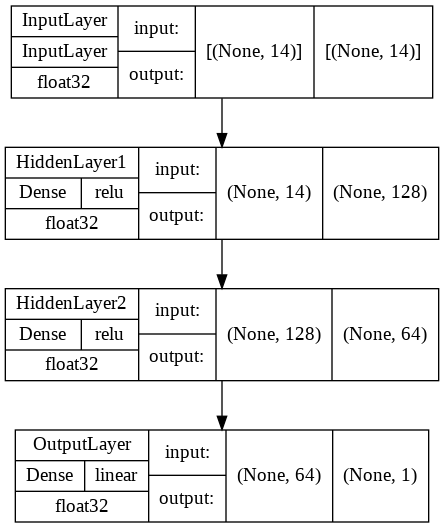

In [68]:
model2_img_file = 'model2.png'
tf.keras.utils.plot_model(model2, to_file=model2_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

Model with 3 Hidden Layers

In [69]:
model3 = tf.keras.Sequential()

model3.add(layers.InputLayer(14,name="InputLayer"))
#model3.add(layers.Dense(14,input_dim=x_train.shape[1],activation="relu",name="InputLayer"))
model3.add(layers.Dense(128,activation="relu",name="HiddenLayer1"))
model3.add(layers.Dense(64,activation="relu",name="HiddenLayer2"))
model3.add(layers.Dense(32,activation="relu",name="HiddenLayer3"))
model3.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt3 = tf.keras.optimizers.SGD(learning_rate=0.1)
model3.compile(loss="MeanAbsoluteError",optimizer=opt3 ,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 HiddenLayer3 (Dense)        (None, 32)                2080      
                                                                 
 OutputLayer (Dense)         (None, 1)                 33        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


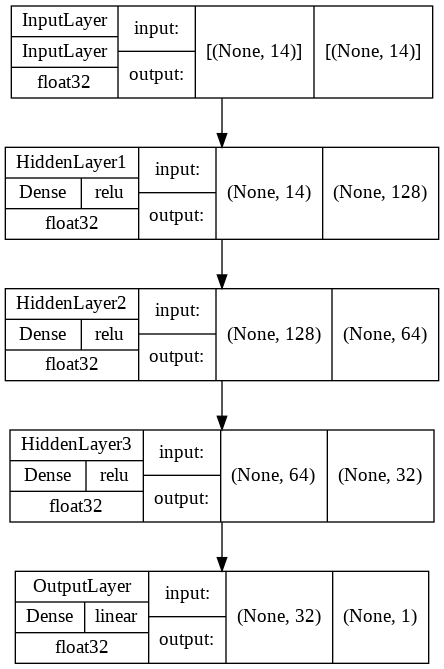

In [70]:
model3_img_file = 'model3.png'
tf.keras.utils.plot_model(model3, to_file=model3_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

Fitting and Evaluating the Models. To find the model with least test errors.

In [71]:
model1.fit(x_train, y_train,batch_size=32,epochs=20,validation_split=0.15)
model1.evaluate(x_test,y_test)

Epoch 1/20
6/6 [==============================] - 0s 30ms/step - loss: 17.9965 - root_mean_squared_error: 19.9540 - val_loss: 13.6565 - val_root_mean_squared_error: 15.6423
Epoch 2/20
6/6 [==============================] - 0s 6ms/step - loss: 10.1466 - root_mean_squared_error: 12.5090 - val_loss: 5.4332 - val_root_mean_squared_error: 6.6733
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 6.2645 - root_mean_squared_error: 7.6105 - val_loss: 5.1994 - val_root_mean_squared_error: 6.3440
Epoch 4/20
6/6 [==============================] - 0s 6ms/step - loss: 5.9134 - root_mean_squared_error: 7.2292 - val_loss: 4.9025 - val_root_mean_squared_error: 6.0355
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 5.6361 - root_mean_squared_error: 6.8439 - val_loss: 5.0841 - val_root_mean_squared_error: 6.6048
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 5.3464 - root_mean_squared_error: 6.5379 - val_loss: 4.3855 - val_root_mean_squared

[2.811452865600586, 3.741093873977661]

In [72]:
model2.fit(x_train, y_train,batch_size=32,epochs=20,validation_split=0.15)
model2.evaluate(x_test,y_test)

Epoch 1/20
6/6 [==============================] - 0s 27ms/step - loss: 17.7556 - root_mean_squared_error: 19.7805 - val_loss: 9.7842 - val_root_mean_squared_error: 11.7429
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 7.5236 - root_mean_squared_error: 9.4368 - val_loss: 5.2818 - val_root_mean_squared_error: 6.7090
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 6.6220 - root_mean_squared_error: 8.4257 - val_loss: 8.6183 - val_root_mean_squared_error: 10.3393
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 7.0278 - root_mean_squared_error: 8.4965 - val_loss: 5.3010 - val_root_mean_squared_error: 6.1717
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 8.2936 - root_mean_squared_error: 10.3241 - val_loss: 5.5454 - val_root_mean_squared_error: 7.0951
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 7.8128 - root_mean_squared_error: 9.7299 - val_loss: 5.0033 - val_root_mean_squared_

[3.084998369216919, 3.432490348815918]

In [73]:
model3.fit(x_train, y_train,batch_size=32,epochs=20,validation_split=0.15)
model3.evaluate(x_test,y_test)

Epoch 1/20
6/6 [==============================] - 0s 30ms/step - loss: 17.9320 - root_mean_squared_error: 19.9602 - val_loss: 6.6593 - val_root_mean_squared_error: 7.7994
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 16.5640 - root_mean_squared_error: 18.8098 - val_loss: 17.8093 - val_root_mean_squared_error: 19.5514
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 17.3552 - root_mean_squared_error: 19.4075 - val_loss: 14.7481 - val_root_mean_squared_error: 16.7703
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 11.3210 - root_mean_squared_error: 13.7899 - val_loss: 14.8417 - val_root_mean_squared_error: 16.8453
Epoch 5/20
6/6 [==============================] - 0s 6ms/step - loss: 10.9685 - root_mean_squared_error: 13.6262 - val_loss: 10.2490 - val_root_mean_squared_error: 12.3265
Epoch 6/20
6/6 [==============================] - 0s 6ms/step - loss: 8.5640 - root_mean_squared_error: 10.7073 - val_loss: 12.5768 - val_roo

[6.391872406005859, 7.231201171875]

As we can see Model-2 (2 Hidden Layers) has least Rsme Error.  
Model-2 will be used to hypertune futher more.

1. b) Finding the Best number of epochs.

In [101]:
epochs=[10,20,30,40]
rsme=[]

for i in epochs:
  model2.fit(x_train, y_train,batch_size=32,epochs=i,validation_split=0.15);
  res = model2.evaluate(x_test,y_test)
  rsme.append(res[1])

perf_epochs = pd.DataFrame(list(zip(epochs,rsme)),columns=["Epochs","RSME"])
perf_epochs

Epoch 1/10
6/6 [==============================] - 0s 30ms/step - loss: 18.3661 - mean_squared_error: 414.3217 - val_loss: 13.3551 - val_mean_squared_error: 237.7252
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 9.1058 - mean_squared_error: 125.4611 - val_loss: 6.5494 - val_mean_squared_error: 58.5707
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 5.9600 - mean_squared_error: 53.2789 - val_loss: 6.0920 - val_mean_squared_error: 51.4760
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 5.9720 - mean_squared_error: 58.5925 - val_loss: 7.5588 - val_mean_squared_error: 81.9263
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 8.2316 - mean_squared_error: 96.3912 - val_loss: 4.4223 - val_mean_squared_error: 33.7810
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 5.8599 - mean_squared_error: 50.8845 - val_loss: 12.6908 - val_mean_squared_error: 197.7246
Epoch 7/10
6/6 [===============

,Epochs,RSME
0,10,20.805321
1,20,47.093700
2,30,19.648678
3,40,9.088130


As the number of Epochs increases RSME decreases. 40 is the optimal number of Epochs. (RSME is the Test RSME)

1. c) Activation function

In [78]:
# Sigmoid
model2 = tf.keras.Sequential()

model2.add(layers.InputLayer(14,name="InputLayer"))
model2.add(layers.Dense(128,activation="sigmoid",name="HiddenLayer1"))
model2.add(layers.Dense(64,activation="sigmoid",name="HiddenLayer2"))
model2.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt2 = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [79]:
history2 = model2.fit(np.array(x_train), np.array(y_train),batch_size=32,epochs=40,validation_split=0.15)
model2.evaluate(x_test,y_test)

Epoch 1/40
6/6 [==============================] - 0s 26ms/step - loss: 14.0497 - root_mean_squared_error: 16.6808 - val_loss: 7.5411 - val_root_mean_squared_error: 8.4121
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 7.8649 - root_mean_squared_error: 9.5167 - val_loss: 5.1415 - val_root_mean_squared_error: 6.5083
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 7.4789 - root_mean_squared_error: 8.9213 - val_loss: 4.8597 - val_root_mean_squared_error: 6.4653
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 7.4434 - root_mean_squared_error: 8.8467 - val_loss: 4.8504 - val_root_mean_squared_error: 6.4618
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 7.4703 - root_mean_squared_error: 8.9167 - val_loss: 4.7784 - val_root_mean_squared_error: 6.4663
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 7.5267 - root_mean_squared_error: 8.9733 - val_loss: 4.7448 - val_root_mean_squared_err

[5.226769924163818, 6.598853588104248]

In [82]:
# ReLU
model2 = tf.keras.Sequential()

model2.add(layers.InputLayer(14,name="InputLayer"))
model2.add(layers.Dense(128,activation="relu",name="HiddenLayer1"))
model2.add(layers.Dense(64,activation="relu",name="HiddenLayer2"))
model2.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt2 = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [83]:
history2 = model2.fit(np.array(x_train), np.array(y_train),batch_size=32,epochs=40,validation_split=0.15)
model2.evaluate(x_test,y_test)

Epoch 1/40
6/6 [==============================] - 0s 28ms/step - loss: 17.1981 - root_mean_squared_error: 19.2650 - val_loss: 7.1661 - val_root_mean_squared_error: 8.2450
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 6.7597 - root_mean_squared_error: 8.4353 - val_loss: 7.1049 - val_root_mean_squared_error: 8.2825
Epoch 3/40
6/6 [==============================] - 0s 7ms/step - loss: 5.8168 - root_mean_squared_error: 7.2333 - val_loss: 9.9076 - val_root_mean_squared_error: 10.8715
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 9.9544 - root_mean_squared_error: 11.7922 - val_loss: 6.9117 - val_root_mean_squared_error: 8.1033
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 7.3110 - root_mean_squared_error: 9.4475 - val_loss: 5.0423 - val_root_mean_squared_error: 5.8248
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 8.1465 - root_mean_squared_error: 9.9603 - val_loss: 4.9504 - val_root_mean_squared_e

[5.3424248695373535, 6.136879920959473]

In [108]:
af=[6.5988,6.1368]
pd.DataFrame(af,index=["Sigmoid","Relu"],columns=["RMSE"])

,RMSE
Sigmoid,6.5988
Relu,6.1368


Model with activation Function ReLU has Slightly Less RSME Error than Model with Sigmoid. Therefore ReLU is better.

1. d) Regularization

In [84]:
# No Regularization
model2 = tf.keras.Sequential()

model2.add(layers.InputLayer(14,name="InputLayer"))
model2.add(layers.Dense(128,activation="relu",name="HiddenLayer1"))
model2.add(layers.Dense(64,activation="relu",name="HiddenLayer2"))
model2.add(layers.Dense(1,activation="linear",name="OutputLayer"))

opt2 = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [85]:
history2 = model2.fit(np.array(x_train), np.array(y_train),batch_size=32,epochs=40,validation_split=0.15)
model2.evaluate(x_test,y_test)

Epoch 1/40
6/6 [==============================] - 0s 26ms/step - loss: 18.4434 - root_mean_squared_error: 20.4248 - val_loss: 12.8047 - val_root_mean_squared_error: 14.8999
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 8.0952 - root_mean_squared_error: 10.0054 - val_loss: 6.9901 - val_root_mean_squared_error: 8.2133
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 6.9306 - root_mean_squared_error: 8.7866 - val_loss: 6.4312 - val_root_mean_squared_error: 7.5530
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 6.4352 - root_mean_squared_error: 8.2129 - val_loss: 4.6785 - val_root_mean_squared_error: 5.5157
Epoch 5/40
6/6 [==============================] - 0s 9ms/step - loss: 6.8062 - root_mean_squared_error: 8.3433 - val_loss: 4.3430 - val_root_mean_squared_error: 5.7706
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 6.9751 - root_mean_squared_error: 8.8118 - val_loss: 7.4786 - val_root_mean_squared_

[6.487657070159912, 7.150537014007568]

In [86]:
# L1 Regularization
model2 = tf.keras.Sequential()

model2.add(layers.InputLayer(14,name="InputLayer"))
model2.add(layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l1(),name="HiddenLayer1"))
model2.add(layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l1(),name="HiddenLayer2"))
model2.add(layers.Dense(1,activation="linear",kernel_regularizer=tf.keras.regularizers.l1(),name="OutputLayer"))

opt2 = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [87]:
history2 = model2.fit(np.array(x_train), np.array(y_train),batch_size=32,epochs=40,validation_split=0.15)
model2.evaluate(x_test,y_test)

Epoch 1/40
6/6 [==============================] - 0s 29ms/step - loss: 26.8755 - root_mean_squared_error: 19.9808 - val_loss: 19.7489 - val_root_mean_squared_error: 13.1815
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 17.4632 - root_mean_squared_error: 10.7160 - val_loss: 13.6820 - val_root_mean_squared_error: 6.8650
Epoch 3/40
6/6 [==============================] - 0s 8ms/step - loss: 15.7445 - root_mean_squared_error: 9.7601 - val_loss: 18.7912 - val_root_mean_squared_error: 12.3481
Epoch 4/40
6/6 [==============================] - 0s 9ms/step - loss: 18.0691 - root_mean_squared_error: 12.4984 - val_loss: 16.3473 - val_root_mean_squared_error: 11.0708
Epoch 5/40
6/6 [==============================] - 0s 8ms/step - loss: 15.9440 - root_mean_squared_error: 11.0080 - val_loss: 13.5253 - val_root_mean_squared_error: 8.1503
Epoch 6/40
6/6 [==============================] - 0s 7ms/step - loss: 13.1441 - root_mean_squared_error: 8.1227 - val_loss: 13.0389 - val_root

[8.344733238220215, 8.550118446350098]

In [91]:
# L2 Regularization
model2 = tf.keras.Sequential()

model2.add(layers.InputLayer(14,name="InputLayer"))
model2.add(layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(),name="HiddenLayer1"))
model2.add(layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(),name="HiddenLayer2"))
model2.add(layers.Dense(1,activation="linear",kernel_regularizer=tf.keras.regularizers.l2(),name="OutputLayer"))

opt2 = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 OutputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [89]:
history2 = model2.fit(np.array(x_train), np.array(y_train),batch_size=32,epochs=40,validation_split=0.15)
model2.evaluate(x_test,y_test)

Epoch 1/40
6/6 [==============================] - 1s 28ms/step - loss: 18.5408 - root_mean_squared_error: 19.4473 - val_loss: 9.5563 - val_root_mean_squared_error: 10.0023
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 8.7645 - root_mean_squared_error: 9.4032 - val_loss: 8.1915 - val_root_mean_squared_error: 8.7762
Epoch 3/40
6/6 [==============================] - 0s 7ms/step - loss: 7.9629 - root_mean_squared_error: 8.6841 - val_loss: 6.1030 - val_root_mean_squared_error: 6.3655
Epoch 4/40
6/6 [==============================] - 0s 8ms/step - loss: 8.7238 - root_mean_squared_error: 9.6316 - val_loss: 8.4614 - val_root_mean_squared_error: 8.7906
Epoch 5/40
6/6 [==============================] - 0s 7ms/step - loss: 9.7820 - root_mean_squared_error: 10.3563 - val_loss: 10.4372 - val_root_mean_squared_error: 10.4361
Epoch 6/40
6/6 [==============================] - 0s 10ms/step - loss: 8.7008 - root_mean_squared_error: 9.6449 - val_loss: 10.1500 - val_root_mean_squar

[5.203474044799805, 4.987967491149902]

In [110]:
af=[7.1505,8.5501,4.9879]
pd.DataFrame(af,index=["None","L1","L2"],columns=["RMSE"])

,RMSE
None,7.1505
L1,8.5501
L2,4.9879


L2 Regularization is Better.

1. d) Learning rate

In [103]:
def create_model(lr):
  model2 = tf.keras.Sequential()

  model2.add(layers.InputLayer(14,name="InputLayer"))
  model2.add(layers.Dense(128,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(),name="HiddenLayer1"))
  model2.add(layers.Dense(64,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(),name="HiddenLayer2"))
  model2.add(layers.Dense(1,activation="linear",kernel_regularizer=tf.keras.regularizers.l2(),name="OutputLayer"))

  opt2 = tf.keras.optimizers.SGD(learning_rate=lr)
  model2.compile(loss="MeanAbsoluteError",optimizer=opt2,metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model2


In [104]:
lrs = [1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
rsme2 = []
for i in lrs:
  model = create_model(i)
  model.fit(x_train, y_train,batch_size=32,epochs=40,validation_split=0.15);
  res = model.evaluate(x_test,y_test)
  rsme2.append(res[1])

perf_epochs = pd.DataFrame(list(zip(lrs,rsme2)),columns=["Learning_Rates","RSME"])
perf_epochs

Epoch 1/40
6/6 [==============================] - 0s 32ms/step - loss: 28.5990 - root_mean_squared_error: 28.6720 - val_loss: 19.0251 - val_root_mean_squared_error: 13.6582
Epoch 2/40
6/6 [==============================] - 0s 7ms/step - loss: 32.6264 - root_mean_squared_error: 25.2959 - val_loss: 23.9256 - val_root_mean_squared_error: 14.1693
Epoch 3/40
6/6 [==============================] - 0s 7ms/step - loss: 20.4511 - root_mean_squared_error: 11.6900 - val_loss: 15.9751 - val_root_mean_squared_error: 7.9342
Epoch 4/40
6/6 [==============================] - 0s 7ms/step - loss: 17.1744 - root_mean_squared_error: 10.3651 - val_loss: 15.4935 - val_root_mean_squared_error: 9.2033
Epoch 5/40
6/6 [==============================] - 0s 8ms/step - loss: 17.7033 - root_mean_squared_error: 12.8001 - val_loss: 15.8775 - val_root_mean_squared_error: 10.4072
Epoch 6/40
6/6 [==============================] - 0s 7ms/step - loss: 14.9076 - root_mean_squared_error: 10.5238 - val_loss: 13.3509 - val_ro

,Learning_Rates,RSME
0,1.00000,6.602563
1,0.30000,5.046571
2,0.10000,4.037293
3,0.01000,6.082713
4,0.03000,2.732230
5,0.00100,16.341396
6,0.00010,17.908066
7,0.00001,18.419968


RSME is least for learning rates 0.03 and 0.1.

2. Visualize the training and validation loss against the epochs

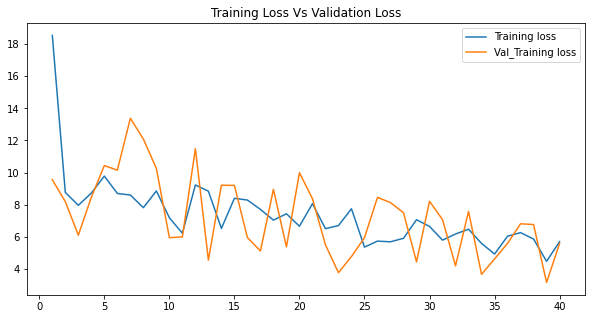

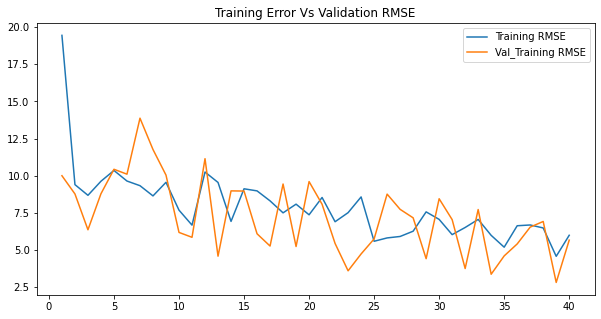

In [99]:

loss = history2.history['loss']
acc = history2.history['root_mean_squared_error']
val_loss = history2.history['val_loss']
val_acc = history2.history['val_root_mean_squared_error']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Val_Training loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training RMSE')
plt.plot(epochs, val_acc, label='Val_Training RMSE')
plt.title("Training Error Vs Validation RMSE")
plt.legend()
plt.show()

In training loss VS validation loss we can see that as the number of epochs  increases the training loss and validation loss decreases and satibilizes (i.e, overlaps). Therefore Incresing the number of Epoches might not help much

In [ ]:
# param = {
#   'epochs' : [10,20,30,40],
#   'batch_size' : [10]
# }
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=model1, param_grid=param, n_jobs=-1, cv=3)

# grid_result = grid.fit(np.array(x_train), np.array(y_train))
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))